In [17]:
import os
import json
import pandas as pd

In [9]:
from autoviz.AutoViz_Class import AutoViz_Class

In [10]:
CURRENT_WORKING_DIRECTORY = os.getcwd()

In [11]:
INPUTS = CURRENT_WORKING_DIRECTORY + "\\INPUTS"
SCRIPTS = CURRENT_WORKING_DIRECTORY + "\\SCRIPTS"

In [13]:
CONFIG_FILE = "config.json"
with open(CURRENT_WORKING_DIRECTORY + "\\" + CONFIG_FILE, encoding='utf-8') as f:
    CONFIG = json.load(f)

In [18]:
TRAIN_PATH = CONFIG["INPUTS"]["TRAIN_PATH"][0]
TEST_PATH = CONFIG["INPUTS"]["TEST_PATH"][0]
TARGET = CONFIG["INPUTS"]["TARGET"]
INDEX_COL = CONFIG["INPUTS"]["INDEX_COLUMNS"]
SEP = CONFIG["INPUTS"]["SEPARATOR"]
DECIMAL = CONFIG["INPUTS"]["DECIMAL"]
ENCODING = CONFIG["INPUTS"]["ENCODING"]
DATE_COLUMNS = CONFIG["INPUTS"]["DATE_COLUMNS"]
FLOAT_PRECISION = CONFIG["INPUTS"]["FLOAT_PRECISION"]
DTYPE = CONFIG["INPUTS"]["DTYPE"]
COLUMNS_WITH_NAN_VALUES = CONFIG["INPUTS"]["COLUMNS_WITH_NAN_VALUES"]

In [19]:
train = pd.read_csv(
    INPUTS + "\\" + TRAIN_PATH,
    index_col=INDEX_COL,
    sep=SEP,
    encoding=ENCODING,
    infer_datetime_format=True,
    engine="c",
    low_memory=False,
    # dtype=DTYPE
)

In [26]:
train.sample(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
309233,3119,67,4,635,2,2408,213,247,129,530,...,0,0,0,0,0,0,0,0,0,1
3607214,3180,337,17,64,47,-193,240,236,125,875,...,0,0,0,0,0,0,0,0,0,1
2441148,2974,120,8,374,124,1032,222,209,75,454,...,0,0,0,0,0,0,0,0,0,2
931118,3053,240,18,222,222,1082,212,187,196,838,...,0,0,0,0,0,0,0,0,0,2
615288,2618,142,9,92,10,1853,200,251,90,2024,...,0,0,0,0,0,0,0,0,0,2


In [22]:
AV = AutoViz_Class()

    max_rows_analyzed is smaller than dataset shape 4000000...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 56)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    55 Predictors classified...
        3 variables removed since they were ID or low-information variables
Since Number of Rows in data 150000 exceeds maximum, randomly sampling 150000 rows for EDA...

################ Multi_Classification VISUALIZATION Started #####################
Number of variables = 52 exceeds limit, finding top 30 variables through XGBoost
    No categorical feature reduction done. All 42 Categorical vars selected 
    Removing correlated variables from 10 numerics using SULO method
Selecting all (10) variables since none of them are highly correlated...
    Adding 42 categorical variables to reduced numeric variables  of 10
############## F E A T U R E   S E L E C T I O N  ###############

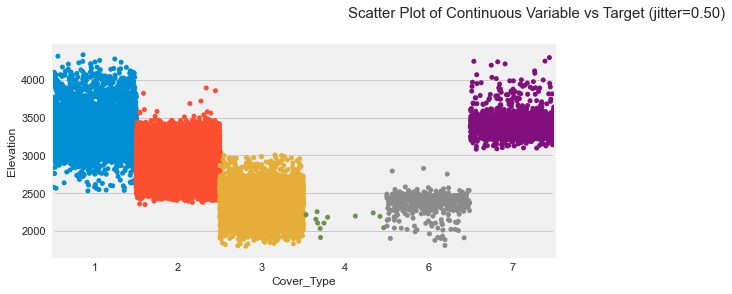

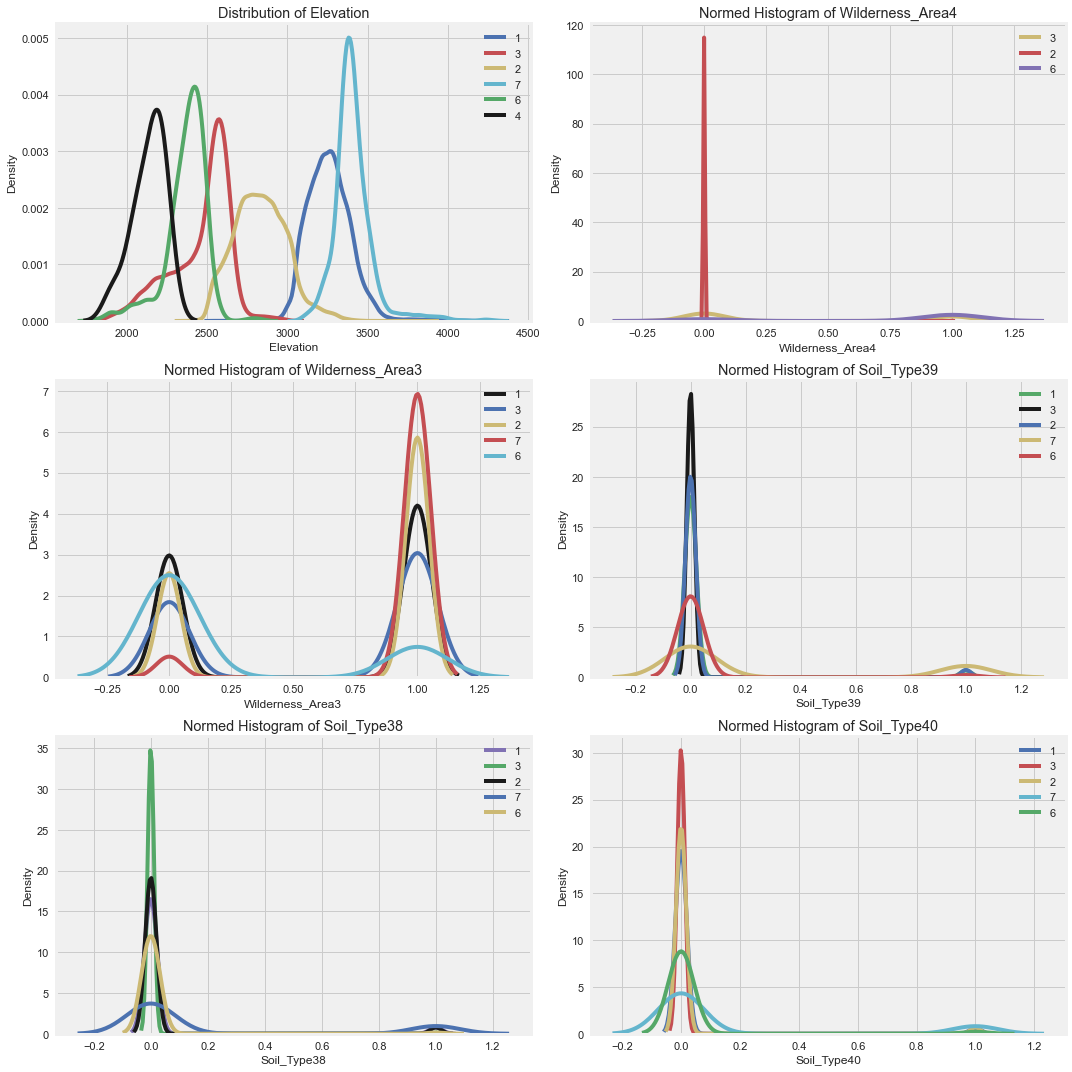

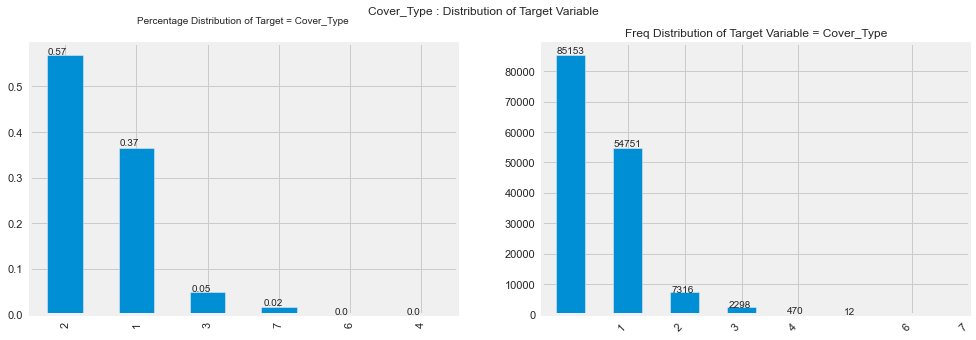

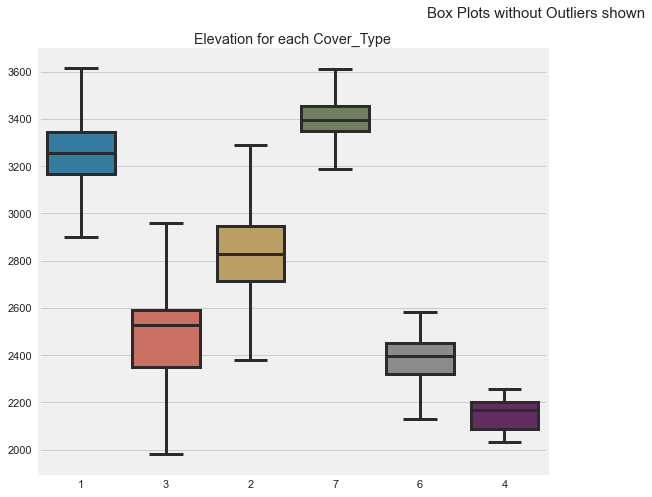

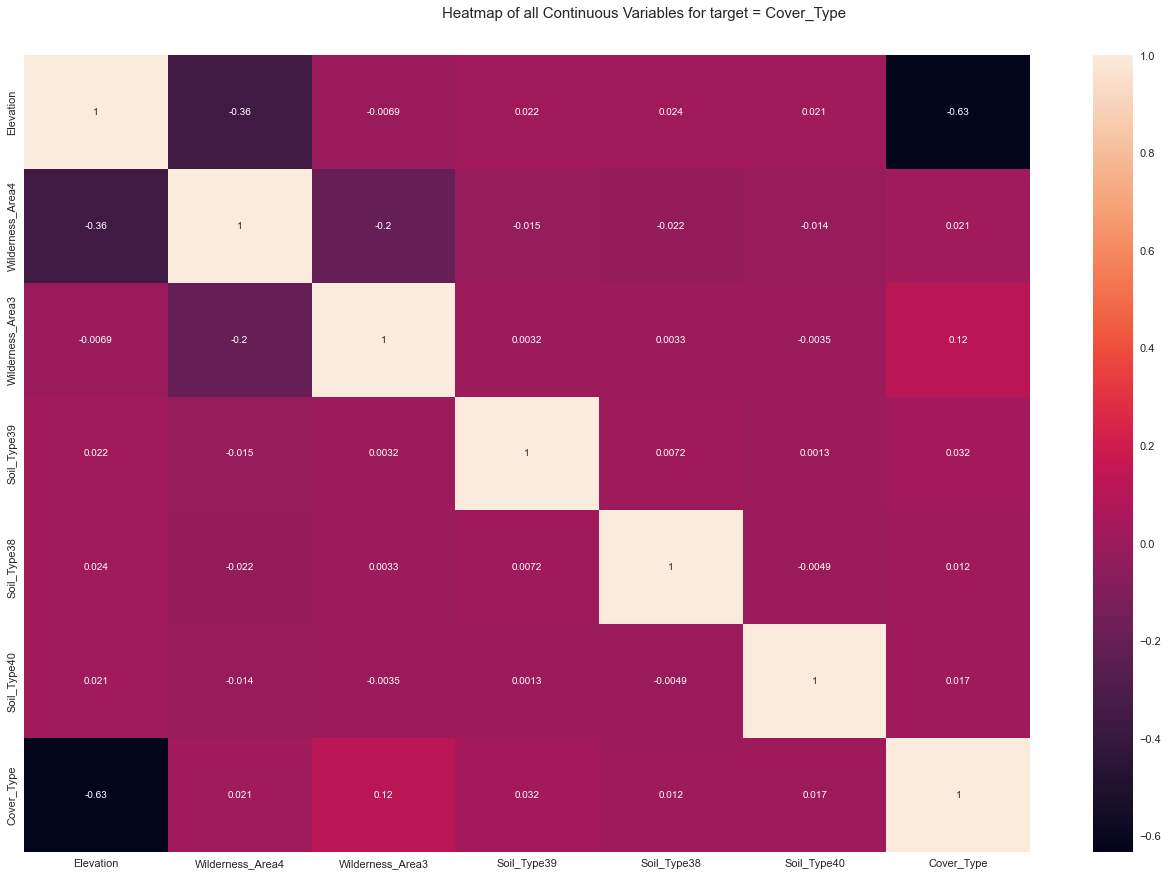

Could not draw Pivot Charts against Dependent Variable


<Figure size 1440x1800 with 0 Axes>

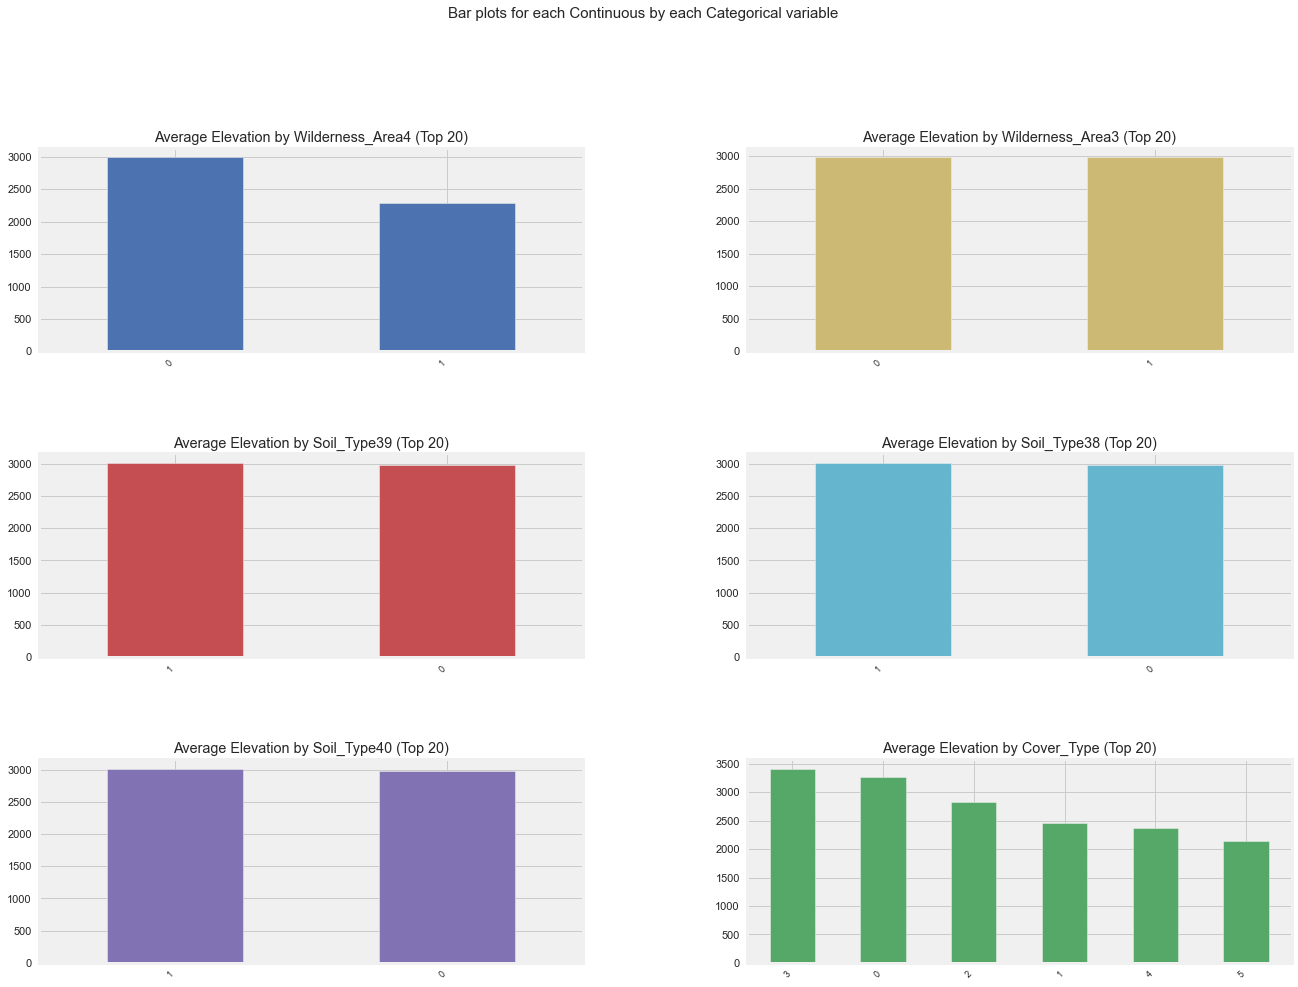

Time to run AutoViz (in seconds) = 112

 ###################### VISUALIZATION Completed ########################


In [25]:
dft = AV.AutoViz('inputs\\train.csv', depVar="Cover_Type")